<a href="https://colab.research.google.com/github/rifkurniawan-dev/projek_arif/blob/main/Proyek_Analisis_Data_Arif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Datasat
- **Nama:** Arif Kurniawan
- **Email:** m299d5y1908@student.devacaademy.id
- **ID Dicoding:** MC299D5Y1908

## Pertanyaan

- bagaimana pengaruh Musim terhadap jumlah penyewaan sepeda

- bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai day

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Duplicat day


In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


memperbaiki type data

In [14]:
datetime_columns = ["dteday"]
for coloumn in datetime_columns:
  day_df[coloumn] = pd.to_datetime(day_df[coloumn])

In [15]:
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Duplikat Hour

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


memperbaiki type data

In [18]:
datetime_columns = ["dteday"]
for coloumn in datetime_columns:
  hour_df[coloumn] = pd.to_datetime(hour_df[coloumn])

In [19]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


menggabungkan Hour & day

In [21]:
day_hour_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="outer",
    left_on="instant",
    right_on="instant"
)
day_hour_df.head()


,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [22]:
day_hour_df.nunique()

,0
instant,17379
dteday_x,731
season_x,4
yr_x,2
mnth_x,12
hr,24
holiday_x,2
weekday_x,7
workingday_x,2
weathersit_x,4


In [23]:
day_hour_df.isna().sum()

,0
instant,0
dteday_x,0
season_x,0
yr_x,0
mnth_x,0
hr,0
holiday_x,0
weekday_x,0
workingday_x,0
weathersit_x,0


## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
518,519,2012-06-02,2,1,6,0,6,0,1,0.583333,0.566288,0.549167,0.186562,2795,5325,8120
84,85,2011-03-26,2,0,3,0,6,0,1,0.265833,0.257571,0.394167,0.209571,981,1515,2496
171,172,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835
678,679,2012-11-09,4,1,11,0,5,1,1,0.361667,0.355413,0.540833,0.214558,709,5283,5992
197,198,2011-07-17,3,0,7,0,0,0,1,0.719167,0.669833,0.604167,0.245033,2006,3296,5302


In [25]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [26]:
day_df.instant.is_unique

True

In [27]:
day_df.groupby(by='dteday').agg({
    'instant': 'nunique',
    'cnt': ['max', 'min', 'mean', 'std']
})

instant   cnt                  
           nunique   max   min    mean std
dteday                                    
2011-01-01       1   985   985   985.0 NaN
2011-01-02       1   801   801   801.0 NaN
2011-01-03       1  1349  1349  1349.0 NaN
2011-01-04       1  1562  1562  1562.0 NaN
2011-01-05       1  1600  1600  1600.0 NaN
...            ...   ...   ...     ...  ..
2012-12-27       1  2114  2114  2114.0 NaN
2012-12-28       1  3095  3095  3095.0 NaN
2012-12-29       1  1341  1341  1341.0 NaN
2012-12-30       1  1796  1796  1796.0 NaN
2012-12-31       1  2729  2729  2729.0 NaN

[731 rows x 5 columns]

In [28]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False).reset_index()


,season,instant
0,3,188
1,2,184
2,1,181
3,4,178


In [29]:
day_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False).reset_index()


,mnth,instant
0,1,62
1,3,62
2,7,62
3,5,62
4,12,62
5,10,62
6,8,62
7,4,60
8,9,60
9,6,60


eksplor Hour_df

In [30]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3468,3469,2011-05-29,2,0,5,10,0,0,0,2,0.66,0.6061,0.83,0.2239,130,121,251
14353,14354,2012-08-26,3,1,8,6,0,0,0,1,0.62,0.5606,0.88,0.2985,5,16,21
5935,5936,2011-09-09,3,0,9,20,0,5,1,1,0.64,0.5606,0.94,0.0896,30,180,210
7349,7350,2011-11-07,4,0,11,20,0,1,1,1,0.40,0.4091,0.71,0.0000,17,187,204
7126,7127,2011-10-29,4,0,10,13,0,6,0,3,0.24,0.1970,0.87,0.5224,0,30,30


In [31]:
weather_data = hour_df.groupby(by="weathersit")['cnt'].sum().sort_values(ascending=False).reset_index()

In [32]:
hour_df.sample(5)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11361,11362,2012-04-23,2,1,4,14,0,1,1,3,0.36,0.3182,0.62,0.4478,12,102,114
6520,6521,2011-10-04,4,0,10,6,0,2,1,1,0.40,0.4091,0.82,0.1045,3,109,112
14000,14001,2012-08-11,3,1,8,13,0,6,0,1,0.80,0.7424,0.49,0.3582,228,341,569
205,206,2011-01-09,1,0,1,20,0,0,0,1,0.14,0.1212,0.46,0.2537,0,38,38
8700,8701,2012-01-03,1,1,1,8,0,2,1,1,0.16,0.1364,0.55,0.2836,5,349,354


In [33]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


<Axes: >

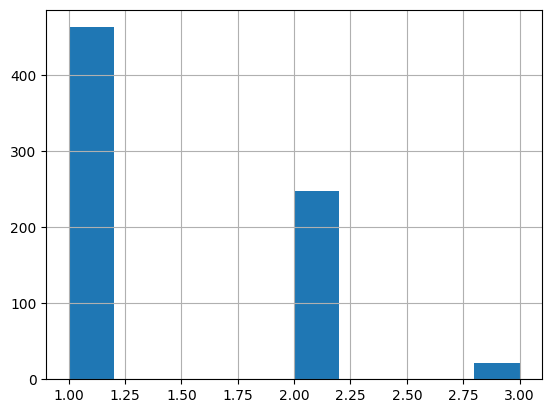

In [34]:
day_df.weathersit.hist()


In [36]:
instant_in_hour_df =  hour_df.instant
day_df["status"] = day_df["instant"].apply(lambda x: "Active" if x in instant_in_hour_df else "Non Active") # Changed instant_in_hour_df to instant_in_orders_df
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
719,720,2012-12-20,4,1,12,0,4,1,2,0.330000,0.335217,0.667917,0.132463,314,3814,4128,Active
546,547,2012-06-30,3,1,6,0,6,0,1,0.765000,0.687508,0.601250,0.161071,1455,4232,5687,Active
235,236,2011-08-24,3,0,8,0,3,1,1,0.673333,0.630692,0.605000,0.253108,949,4181,5130,Active
515,516,2012-05-30,2,1,5,0,3,1,2,0.656667,0.611129,0.670000,0.134329,745,6110,6855,Active
84,85,2011-03-26,2,0,3,0,6,0,1,0.265833,0.257571,0.394167,0.209571,981,1515,2496,Active


In [37]:
day_df.groupby(by="status").instant.count()

,instant
status,
Active,731


## Explore day_df & hour_df

In [38]:
hour_day_df = pd.merge(
      left=hour_df,
      right=day_df,
      how="left",
      left_on="instant",
      right_on="instant"
)
hour_day_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,Active
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,Active
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,Active
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,Active
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,Active


In [39]:
hour_day_df.groupby(by="season_x").instant.nunique().sort_values(ascending=False).head(10)

,instant
season_x,
3,4496
2,4409
1,4242
4,4232


In [40]:
hour_day_df.groupby(by="dteday_x").instant.nunique().sort_values(ascending=False)

,instant
dteday_x,
2012-12-31,24
2011-01-01,24
2012-12-30,24
2012-12-29,24
2012-12-28,24
...,...
2011-01-26,16
2011-01-18,12
2012-10-30,11


In [41]:
hour_day_df["weather_category"] = hour_day_df["weathersit_x"].apply(lambda x: "Clear/Good Weather" if x == 1 else ("Moderate Weather" if x == 2 else "Bad Weather"))

In [42]:
hour_day_df.groupby("weather_category").instant.nunique().sort_values(ascending=False).reset_index()

,weather_category,instant
0,Clear/Good Weather,11413
1,Moderate Weather,4544
2,Bad Weather,1422


In [43]:
hour_day_df.to_csv("hour_day.csv", index=False)

Menghubungkan semua

## Visualization & Explanatory Analysis

Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda

In [44]:
hour_day_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status,weather_category
4367,4368,2011-07-05,3,0,7,21,0,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear/Good Weather
13341,13342,2012-07-15,3,1,7,2,0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Weather
15230,15231,2012-10-01,4,1,10,19,0,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Weather
3087,3088,2011-05-13,2,0,5,13,0,5,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Weather
10393,10394,2012-03-14,1,1,3,4,0,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear/Good Weather


In [45]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Active
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Active
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Active
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Active
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Active


In [63]:
seasonal_influence = hour_day_df.groupby(by="season_x")["cnt_x"].sum().reset_index()
seasonal_influence.rename(columns={
    "cnt_x": "Total Penyewaan Sepeda",
    "season_x": "Musim"
}, inplace=True)

seasonal_influence.head(10)

,Musim,Total Penyewaan Sepeda
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


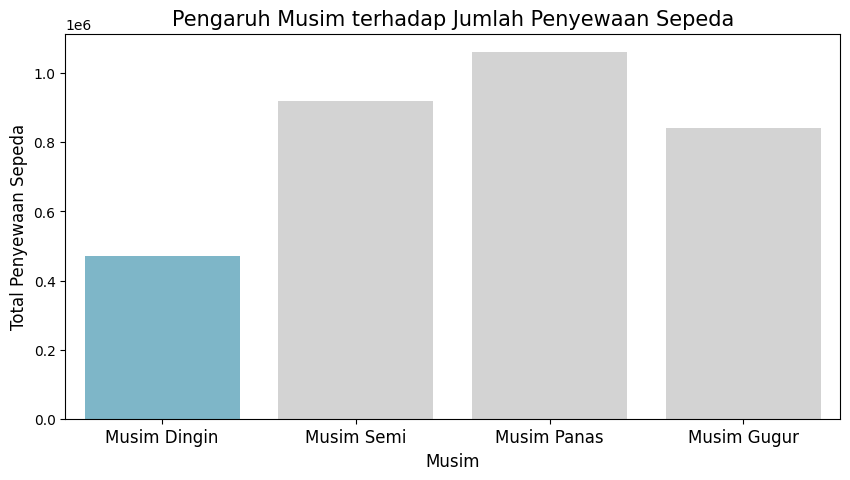

In [64]:
musim_mapping = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
seasonal_influence['Musim'] = seasonal_influence['Musim'].map(musim_mapping)

seasonal_influence['Musim'] = pd.Categorical(
    seasonal_influence['Musim'],
    categories=["Musim Dingin", "Musim Semi", "Musim Panas", "Musim Gugur"],
    ordered=True
)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="Musim",
    y="Total Penyewaan Sepeda",
    hue="Musim",
    data=seasonal_influence.sort_values(by="Musim"),
    palette=colors_,
    dodge=False,
    legend=False
)

plt.title("Pengaruh Musim terhadap Jumlah Penyewaan Sepeda", loc="center", fontsize=15)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xlabel("Musim", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()


bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda

In [67]:
weather_influence = hour_day_df.groupby('weathersit_x')[['temp_x', 'atemp_x','cnt_x']].mean().sort_values(by=['cnt_x'], ascending=False).reset_index()
weather_influence.columns = ['Kondisi Cuaca', 'Rata-rata Suhu', 'Rata-rata Suhu Terasa', 'Rata-rata Penyewaan Sepeda']
weather_influence.head(10)


,Kondisi Cuaca,Rata-rata Suhu,Rata-rata Suhu Terasa,Rata-rata Penyewaan Sepeda
0,1,0.511054,0.488387,204.869272
1,2,0.474445,0.456591,175.165493
2,3,0.456688,0.436386,111.579281
3,4,0.186667,0.186900,74.333333


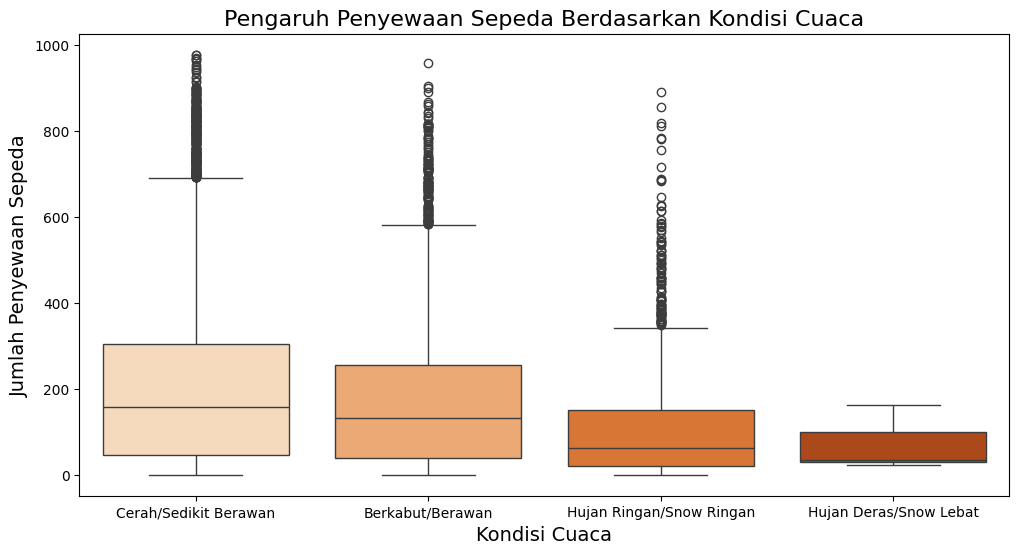

In [68]:
weather_mapping = {
    1: 'Cerah/Sedikit Berawan',
    2: 'Berkabut/Berawan',
    3: 'Hujan Ringan/Snow Ringan',
    4: 'Hujan Deras/Snow Lebat'
}
hour_day_df['weathersit_description'] = hour_day_df['weathersit_x'].map(weather_mapping)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='weathersit_description',
    y='cnt_x',
    data=hour_day_df,
    palette='Oranges',
    hue='weathersit_description',
    dodge=False
)
plt.title('Pengaruh Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.legend([], [], frameon=False)
plt.show()

# Conclusion

Conclusion Pertanyaan 1 : penyewaan sepeda paling tinggi terjadi pada Musim Panas, diikuti oleh Musim Semi dan Musim Gugur. Musim Dingin menunjukkan jumlah penyewaan sepeda terendah. Hal ini menunjukkan bahwa penyewaan sepeda lebih populer di musim dengan cuaca yang lebih hangat dibandingkan dengan musim dingin.
Conclusion Pertanyaan 2 : Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Kondisi cuaca cerah atau sedikit berawan menunjukkan tingkat penyewaan tertinggi, sementara kondisi cuaca buruk seperti hujan atau salju mengakibatkan penurunan penyewaan secara drastis. Semakin ekstrem cuaca, semakin rendah minat masyarakat dalam menyewa sepeda.